---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company. 
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient.

In [45]:
import networkx as nx

######################
#      Visualizing in various Graphの課題      #
# Q1. Edge-List ファイルからDirected Multi-Graphを読み込む
# Q2. Easy
# Q3. is_strongly_connected
# Q4. Easy
# Q5. Easy
# Q6. Generate strongly connected components as subgraphs.
# Q7. Average Shortest Path Length (on the largest strongly connected components)
# Q8. Diameterを求める
# Q9. Peripheryを求める (the set of nodes with eccentricity equal to the diameter)
# Q10. Centerを求める      (the set of nodes with eccentricity equal to radius)
# Q11. 到達に最も時間のかかりやすいノードは? (ネットワーク上の他のノードから最も遠いのが多いノード; 結構複雑。)
# Q12. Q11のノードへのコミュニケーションを遮断するには何ヶ所ノードを除去すれば良いか
# Q13. Direct GraphからUndirect Graphを作成する
# Q14. transitivity and average clustering coefficient of graph 
######################



#####!!REVIEW!!##
# Global Clustering Coefficiency  --> nx.transitivity(G) or nx.average_clustering(G)
# Local Clustering Coefficiency  --> nx.clustering(G, 'A')
# Breadth First Search 結果を得る(A起点)  --> T = nx.bfs_tree(G, 'A')   T.edges()
# 全ノードの最短経路を求める  --> nx.shortest_path_length(G, 'A')
# 全Eccentricity  --> nx.eccentricity(G)
# radius : the minimum eccentricity,  center: the nodes which have radius.
# periphery : the nodes which have the maxmum eccentricity
# 全Connected Componentsを求める  --> sorted(nx.connected_components(G))
# 双方向にメッセージを送れるComponentsを全部求める  --> sorted(nx.strongly_connected_components(G))
# Nodeを何ヶ所切断すれば両者間でコミュニケーションが取れなくなるか出力→ print(nx.node_connectivity(G_sc, node, target_node))
# どこのNodeを切断すれば両者間でコミュニケーションが取れなくなるか出力→ print(nx.minimum_node_cut(G_sc, node, target_node))
#######

# This line must be commented out when submitting to the autograder
# !head email_network.txt

#Sender	Recipient	time
1	2	1262454010
1	3	1262454010
1	4	1262454010
1	5	1262454010
1	6	1262454010
1	7	1262454010
1	8	1262454010
1	9	1262454010
1	10	1262454010


### Question 1

Using networkx, load up the directed multigraph from `email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

[('1', '2', {'time': 1262454010}), ('1', '2', {'time': 1262604260}), ('1', '2', {'time': 1262645364}), ('1', '2', {'time': 1262734830}), ('1', '2', {'time': 1262734947})] 

[('163', '23', {'time': 1272933171}), ('164', '18', {'time': 1274205697}), ('165', '2', {'time': 1274291942}), ('165', '51', {'time': 1274790355}), ('167', '47', {'time': 1285244700})] 



<IPython.core.display.Javascript object>


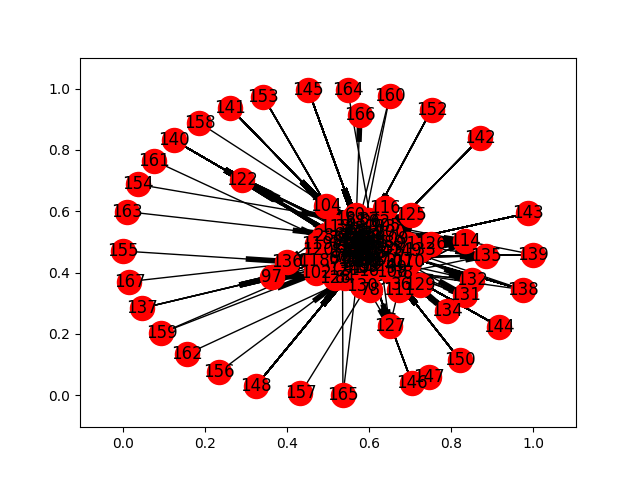

In [46]:
def answer_one():
    
    # Your Code Here
    G = nx.read_edgelist('email_network.txt', create_using=nx.MultiDiGraph(), nodetype=str, data=(('time', int),))
    
    return G# Your Answer Here
G = answer_one()
print(G.edges(data=True)[:5], '\r\n')
print(G.edges(data=True)[-5:], '\r\n')
# %matplotlib notebook
# nx.draw_networkx(G)

### Question 2

How many employees and emails are represented in the graph from Question 1?

*This function should return a tuple (#employees, #emails).*

In [47]:
def answer_two():
        
    # Your Code Here
    
    return len(G.nodes()), len(G.edges())# Your Answer Here
answer_two()

(167, 82927)

### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the receiver, but not vice versa. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [48]:
def answer_three():
        
    # Your Code Here
    
    return nx.is_strongly_connected(G), nx.is_weakly_connected(G)# Your Answer Here
answer_three()

(False, True)

### Question 4

How many nodes are in the largest (in terms of nodes) weakly connected component?

*This function should return an int.*

In [49]:
def answer_four():
        
    # Your Code Here
    
    w_cs = sorted([len(components) for components in nx.weakly_connected_components(G)])
    
    return max(w_cs)# Your Answer Here
answer_four()

167

### Question 5

How many nodes are in the largest (in terms of nodes) strongly connected component?

*This function should return an int*

In [50]:
def answer_five():
        
    # Your Code Here
    
    s_cs = sorted([len(components) for components in nx.strongly_connected_components(G)])
    
    return max(s_cs)# Your Answer Here
answer_five()

126

### Question 6

Using the NetworkX function strongly_connected_component_subgraphs, find the subgraph of nodes in a largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [51]:
def answer_six():
        
    # Your Code Here
    
    return max(nx.strongly_connected_component_subgraphs(G), key=len)# Your Answer Here

G_sc = answer_six()
len(G_sc)

126

### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [52]:
def answer_seven():
        
    # Your Code Here
    
    return nx.average_shortest_path_length(G_sc)# Your Answer Here
answer_seven()


1.6461587301587302

### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [53]:
def answer_eight():
        
    # Your Code Here

    return nx.diameter(G_sc)# Your Answer Here
answer_eight()

3

### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [54]:
def answer_nine():
       
    # Your Code Here
    
    return set(nx.periphery(G_sc))# Your Answer Here <- nx.periphery()はlistで返すのでsetでくくる。
answer_nine()

{'129', '134', '97'}

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [55]:
def answer_ten():
        
    # Your Code Here
    
    return set(nx.center(G_sc))# Your Answer Here
answer_ten()

{'38'}

### Question 11

Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc?

How many nodes are connected to this node?


*This function should return a tuple (name of node, number of satisfied connected nodes).*

In [65]:
def answer_eleven():
        
    # Your Code Here
    peripheries = []
    diameter = answer_eight()
    
    for periphery in nx.periphery(G_sc):
        print('periphery is ', periphery)

        # BFS Treeを求める
        T = nx.bfs_tree(G_sc, periphery)
        # Shortest Pathを求める
        shortest_paths = nx.shortest_path_length(T, periphery)
        
        print('bfs-treeの頂点からのshortest pathを求めたもの=>', shortest_paths, '\r\n')
        
        # Shortest Path(BFS Tree)の中でパスがDiameterのノードをフィルタリング（dictionaryのsecondバリューでフィルター）
        filtered_list = [ x for x in shortest_paths.items() if x[1] == diameter ]
        
        peripheries.append((periphery, len(filtered_list)))
    print(peripheries, '\r\n\r\n')

    # ネットワーク上の他のノードから最も遠いのが多いノードは?　(listの中のtupleのsecondバリューでmax値を求める)
    return max(peripheries, key=lambda x: x[1])# Your Answer Here

ans = answer_eleven()
print('periphery=97がネットワーク上の他のノードから最も遠いのが多い: ', ans)

periphery is  97
bfs-treeの頂点からのshortest pathを求めたもの=> {'97': 0, '14': 1, '77': 2, '74': 2, '7': 2, '32': 2, '31': 2, '70': 2, '80': 2, '68': 2, '64': 2, '59': 2, '90': 2, '69': 2, '9': 2, '37': 2, '65': 2, '92': 2, '1': 2, '84': 2, '117': 2, '10': 2, '13': 2, '112': 2, '45': 2, '94': 2, '44': 2, '103': 2, '22': 2, '71': 2, '95': 2, '104': 2, '42': 2, '2': 2, '56': 2, '15': 2, '5': 2, '50': 2, '53': 2, '25': 2, '54': 2, '67': 2, '35': 2, '73': 2, '17': 2, '66': 2, '38': 2, '62': 2, '113': 2, '47': 2, '63': 2, '3': 2, '85': 2, '88': 2, '100': 2, '115': 2, '36': 2, '72': 2, '12': 2, '4': 2, '11': 2, '61': 2, '58': 2, '27': 3, '26': 3, '39': 3, '24': 3, '81': 3, '29': 3, '46': 3, '51': 3, '23': 3, '8': 3, '60': 3, '83': 3, '86': 3, '149': 3, '18': 3, '106': 3, '98': 3, '40': 3, '19': 3, '30': 3, '55': 3, '43': 3, '57': 3, '20': 3, '33': 3, '34': 3, '6': 3, '105': 3, '21': 3, '123': 3, '93': 3, '75': 3, '49': 3, '16': 3, '107': 3, '79': 3, '87': 3, '52': 3, '89': 3, '128': 3, '48': 3, '82': 

### Question 12

Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc, what is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)? 

*This function should return an integer.*

[('14', 1)]
6
{'32', '46', '37', '38', '45'}
6 {'32', '46', '14', '37', '38', '45'}
6 {'32', '46', '14', '37', '38', '45'}
6 {'32', '46', '14', '37', '38', '45'}
6 {'32', '46', '14', '37', '38', '45'}
6 {'32', '46', '14', '37', '38', '45'}
6 {'32', '46', '14', '37', '38', '45'}
6 {'32', '14', '37', '38', '45'}
Answer is  5 .
node_degrees:  [('7', 1194), ('48', 1774), ('68', 2822), ('100', 126), ('25', 536), ('121', 285), ('74', 1303), ('62', 425), ('19', 1024), ('3', 9051), ('46', 325), ('34', 259), ('113', 269), ('8', 2054), ('13', 6249), ('24', 1078), ('123', 333), ('97', 18), ('77', 1008), ('58', 1375), ('151', 129), ('71', 1347), ('16', 370), ('55', 235), ('76', 3055), ('124', 192), ('134', 40), ('35', 1327), ('72', 1410), ('86', 3587), ('17', 1944), ('10', 642), ('106', 847), ('65', 1885), ('98', 573), ('30', 764), ('84', 2792), ('103', 460), ('67', 2056), ('73', 975), ('6', 1024), ('5', 1899), ('40', 2650), ('39', 800), ('96', 1871), ('120', 91), ('118', 50), ('50', 5478), ('1', 

<IPython.core.display.Javascript object>


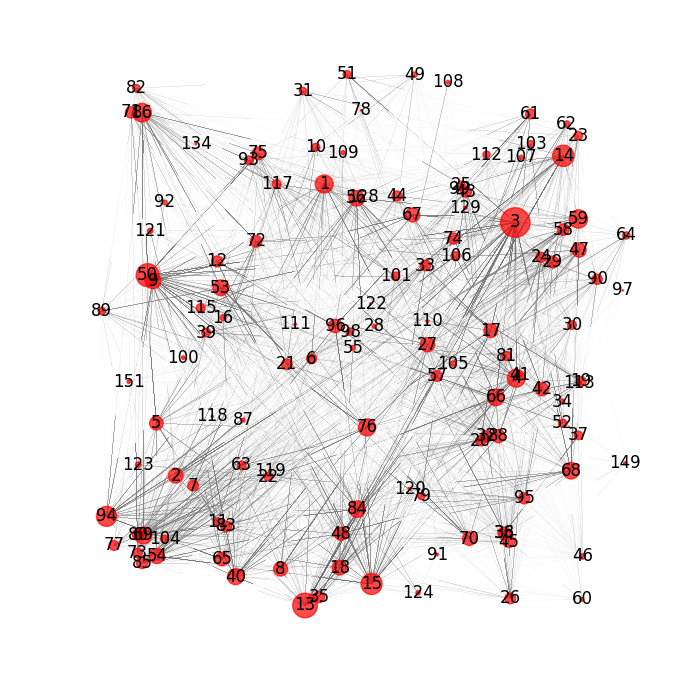

In [64]:
# ノード'97'へのコミュニケーションを遮断するには何ヶ所ノードを除去すれば良いか
def answer_twelve():
        
    # Your Code Here
    # ↑を参考にすると'14'ノードのみがshortest_path = 1なのでそれ以外は'14'を経由している。
    # '14'ノードを切断して他とコミュニケーション取れるか確認する。
    target_node = answer_eleven()[0]
    # BFS Treeを求める
    T = nx.bfs_tree(G_sc, target_node)
    # Shortest Pathを求める
    shortest_paths = nx.shortest_path_length(T, target_node)    
    # shortest_path = 1のみのノードを取得
    path_1_list = [ x for x in shortest_paths.items() if x[1] == 1 ]
    
    print(path_1_list)
    
    for node, path in path_1_list:
        print(nx.node_connectivity(G_sc, node, target_node))
        print(nx.minimum_node_cut(G_sc, node, target_node))
        # ↑どうやらDirect Graphなので BFS Treeからはどのノードを切断すれば他とコミュニケーション取れるかわからないようだ。
        
    # shortest_pathが最も遠いノードからも同じ結果か確認する
    path_3_list = [ x for x in shortest_paths.items() if x[1] == 3 ][:7] # 63ノードもあるので7つぐらいにしておく。
    for node, path in path_3_list:
        print(nx.node_connectivity(G_sc, node, target_node), nx.minimum_node_cut(G_sc, node, target_node))
        # ↑どうやらnx.node_connectivityは両者間同士ではなくグラフ全体を通しての最小必要数なようだ（minimum_node_cutはそれより少ないことがある）。
        
    # 以下がフォーラムで書かれていた。
    # the difference between node_connectivity and minimum_node_cut is that the former works on an approximation algorithm and gives a tight lower bound, but not the actual/exact value for the number of nodes that need to be removed
    # minimum_node_cut, on the other hand, gives an exact value by calculating all the paths between source and target.
    # nx.node_connectivity really ought to give the right answer. The issue might be how this function handles the case when the nodes that are specified are having a direct edge between them. This case is strictly speaking not an allowed case if you think about it. If two nodes have a direct edge, then no matter how many other nodes you are removing they still will have a path.
    # As it turns out for Question 12 in the assignment there unfortunately is a direct edge between a center node and the edge node from Question 11, and hence the question is actually a nonsensical question. This exception situation apparently is handled differently by node_connectivity() and minimum_node_cut() [which is another approach for getting the answer], with node_connectivity() returning a value 1 larger that the size of the set returned by minimum_node_cut().
    # That is, you might want to try: return nx.node_connectivity(G_sc, center_node, Q11_node) - 1

    return nx.node_connectivity(G_sc, path_1_list[0][0], target_node) - 1# Your Answer Here
ans = answer_twelve()
print('Answer is ', ans, '.')
####
#
#    Graph上でも確認しないとわからないのでグラフで確認する
#
####
import matplotlib.pyplot as plt
%matplotlib notebook

# G_sc : G which is strongly connected
node_degrees = [(v, G_sc.degree(v)) for v in G_sc] # Degreeに応じて色, サイズを変える(degree: the number of edges a node has)
node_size = [0.05*d for v, d in node_degrees]
edge_with = [0.000002*d for v, d in node_degrees]
print('node_degrees: ', node_degrees, ',     "97"ノードのEdge数: ', [d for v, d in node_degrees if v == '97'][0])

# 1. Spring Layout (default): Edges同士が極力交差しないように且つEdgeの長さが同じぐらいになるようにNodeを配置するデザイン
# plt.figure(figsize=(7,7))
# nx.draw_networkx(G_sc, node_size=node_size,
# #                  node_color=node_color,
#                  width=edge_with, cmap=plt.cm.Blues, # color mapをブルーにする
#                  alpha=0.7, edge_color='.4')
# plt.axis('off')
# plt.tight_layout() # paddingを減らす。

# 他のレイアウトも確認してみる  -> 'circular_layout', 'random_layout', 'shell_layout', 'spring_layout', 'spectral_layout', 'fruchterman_reingold_layout'
# print('他のレイアウト -> ', [x for x in nx.__dir__() if x.endswith('_layout')])

# 2. Random Layout: 
plt.figure(figsize=(7,7))
pos = nx.random_layout(G_sc)
nx.draw_networkx(G_sc, pos, node_size=node_size,
#                  node_color=node_color, # 重いので..
                 width=edge_with, cmap=plt.cm.Blues, # color mapをブルーにする
                 alpha=0.7, edge_color='.4')
plt.axis('off')
plt.tight_layout() # paddingを減らす。

### Question 13

Construct an undirected graph G_un using G_sc (you can ignore the attributes).

*This function should return a networkx Graph.*

In [59]:
def answer_thirteen():
        
    # Your Code Here
    G_multi = G_sc.to_undirected()
    # Convert multigraph into simple graph with weighted edges(ignoreしていいとあるのでweightは求めない)
    G = nx.Graph(G_multi)
    return G# Your Answer Here
answer_thirteen()

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*

In [61]:
def answer_fourteen():
        
    # Your Code Here
    G_un = answer_thirteen()
    
    # nx.transitivity(G): Compute graph transitivity, the fraction of all possible triangles present in G.
    # nx.average_clustering(G, trials=1000): Estimates the average clustering coefficient of G.
    
    return nx.transitivity(G_un), nx.average_clustering(G_un)# Your Answer Here
answer_fourteen()

(0.570111160700385, 0.6975272437231417)

他のレイアウト ->  ['circular_layout', 'random_layout', 'shell_layout', 'spring_layout', 'spectral_layout', 'fruchterman_reingold_layout']


<IPython.core.display.Javascript object>


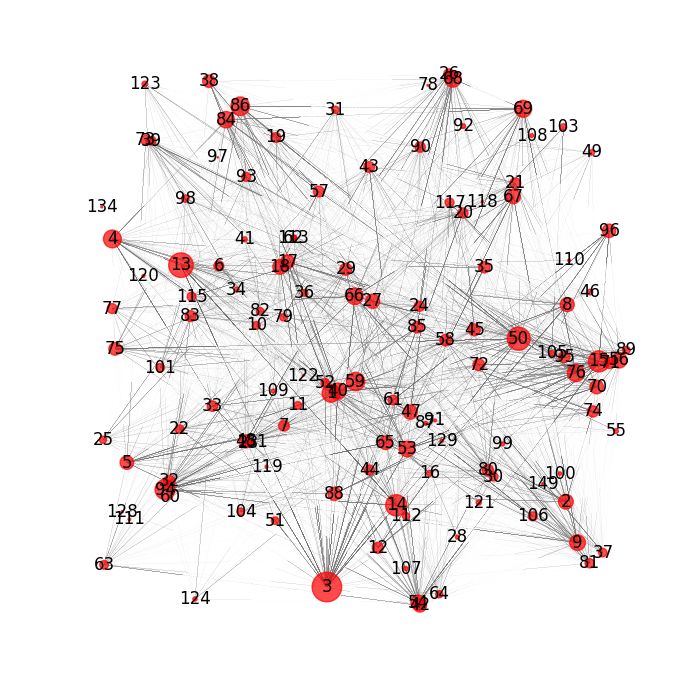